# COMP4381 - Data Science - Assignment 1 #

This is the first indivisual assignment in Data Science Course in Birzeit University.

Prepared By: **Abdallah Abduljalil** at 8th, Apr 2025

In [2]:
import pandas as pd

## 1. Loading and Initial Exploration ##

### 1.1 Load the dataset into a pandas DataFrame. ###

In [6]:
df = pd.read_csv("./googleplaystore.csv")

### 1.2 Display the first 6 rows and the last 6 rows. ###

We can display the first or last n number or rows in a dataset using the head(n) and tail(n), respectfully.

In [10]:
df.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [12]:
df.tail(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### 1.3 Show the shape of the dataset (number of rows and columns). ###

We can figure out what the shape of a dataset using the shape attripute.

In [16]:
df.shape

(10841, 13)

This could insigt us that this dataset contain 10841 rows and 13 columns.

### 1.4 Generate descriptive statistics for numerical columns (e.g., Rating, Reviews, Installs)  with interpretation. ###

We can achieve a descriptive statistics for nummerical by using the df.descrribe() method.

In [21]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Although the csv file contains 3 candidate numeric features (Ratings, Price and Reviews), only one of them is printed out.

This probably because the other two features contains a non-expected non-numeric value which cause that the whole feature column is considered to be a column of type object rather than a type numeric.

However, looking at the resulteds above, the resulted descriptive statistics for Rating feature indicated a low standard deviation value meaning that most Ratings are pointed close to the Mean.

Meaning that most of the ratings are close to the average value 4.19.

another insight is that the mean and median are quite the same suggesting a symmertic distribution of the data points. Also, since values of mean and median are generally high, a positive rating feedback is indicated.

A minimum rating of 1 and a 25th percentile of 4.0 suggests there are some very low ratings, but they’re likely rare given the high mean and median.

If Rating ranges between 1 and 5, then a maximum value of 15 is likely an outlier.

## 2. Data Cleaning ##

### 2.1 Print the data types of all columns and check the ability to have null values. ###

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Since we have a number 10841 of apps (data points), the following features could have null values snice they differ from the expected number:

1. Rating feature has **1474** null values (9367 non-null) : indicates the possibility of having high number of missing values in this feature.
2. Type feature has **1** null value (10840 non-null) : a singe null value will not cause a big problem, we could drop the whole row in this case.
3. Content Rating feature has **1** null value (10840 non-null) : same as 2, a single null value would not cause a big deal. we could also drop it.
4. Current Ver feature has **8** null value (10833 non-null) : slightly small number of missing values compared to the full whole number of rows. Rows Deleting might be the best way to handle these values.
6. Android Ver feature has **3** null value (10838 non-null) : same as 4, slightly small number of missing values compared to the full whole number of rows.

**Important Note**: For feature (Current Ver), a practical and great method to deal with null values could be using **Impulation** (using algorithms to estimate missing values based on other data points). This is because a feature such as Installs and Price could insight us what version that app is (a low number of installs might leas to a lower version of the app (a new application) and free apps mights conclude us that an app might be in his initial versions before becoming paid).

### 2.2 Drop rows where Type (Free/Paid) is missing. ###

We can achieve this task by using the dropna() method.

In [37]:
df.dropna(subset=['Type'], inplace = True)

In [39]:
df = df.reset_index()

Whenever we drop a row in a dataset, it is a good practice to reset indices. This is because the original index values of the remaining rows stay the same, which means they can become non-sequential or have gaps. Also, reset_index is a good practice to make if we want to avoid confusion when iterating or displaying the data.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10840 non-null  object 
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10839 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


We could notice that the "Type" feature now has no non-null value.

### 2.3 For the Rating column, fill missing values with the median rating of the same app category. Explain why you chose the median. ###

In [37]:
df['Rating'] = df.groupby('Category')['Rating'].transform(
    lambda x: x.fillna(x.median())
)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          10840 non-null  float64
 4   Reviews         10840 non-null  object 
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10839 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


To explain why we have used median to fill the null values of Ratings, we need to remember that the maximum value in this feature is 19 which might be an outlier. These outliers and extreme values usually affects the value of the **mean** while the median is not affected by any of them.

In general, we usually use the median to fill null values of a feature when this feature is skewed to the left or right (in these cases mean is not a good choice)

### 2.4 Convert the Installs column to a numeric type (remove commas and "+", e.g., "1,000,000+" → 1000000). ###

In [51]:
df["Installs"] = df["Installs"].str.replace('[,+]', '', regex=True)
df["Installs"] = pd.to_numeric(df["Installs"])

ValueError: Unable to parse string "Free" at position 10471

An error has occured because a value at index 10471 a string "Free", not a number.

In [44]:
df.iloc[10471]

index                                               10472
App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10471, dtype: object

We could notice that this row's values is shifted to the left (a value of "Free" should be assigned to feature **Type** not **Installs**, for example).

A good and effective way to deal with this problem is to drop this row.

In [55]:
df.drop(10471, inplace = True)

In [57]:
df["Installs"] = df["Installs"].str.replace('[,+]', '', regex=True)
df["Installs"] = pd.to_numeric(df["Installs"])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10839 non-null  int64  
 1   App             10839 non-null  object 
 2   Category        10839 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10839 non-null  object 
 5   Size            10839 non-null  object 
 6   Installs        10839 non-null  int64  
 7   Type            10839 non-null  object 
 8   Price           10839 non-null  object 
 9   Content Rating  10839 non-null  object 
 10  Genres          10839 non-null  object 
 11  Last Updated    10839 non-null  object 
 12  Current Ver     10831 non-null  object 
 13  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


Notice how Data Type of installs is now **int64**.

### 2.5 Convert the Price column to a numeric type ($0.99 → 0.99). ###

In [68]:
df["Price"] = df["Price"].str.replace('$', '')
df["Price"] = pd.to_numeric(df["Price"])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10839 non-null  int64  
 1   App             10839 non-null  object 
 2   Category        10839 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10839 non-null  object 
 5   Size            10839 non-null  object 
 6   Installs        10839 non-null  int64  
 7   Type            10839 non-null  object 
 8   Price           10839 non-null  float64
 9   Content Rating  10839 non-null  object 
 10  Genres          10839 non-null  object 
 11  Last Updated    10839 non-null  object 
 12  Current Ver     10831 non-null  object 
 13  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB


Notice how Data Type of Price is now **float64**.

**Very Important Note**: If we have not reset indecies back when we have dropped the rows with null type, the converting proccess will not work even when we drop row number 10471. This is because data indices would be inconsistance and would cause a lot of problem when dealing with accessing a specific row after that (such as accessing row number 10471 to delete it).

## 3. Data Filtering ##

### 3.1 Create a new DataFrame containing only free apps (Type = Free). ###

In [78]:
df_free_apps = df[df["Type"] == "Free"]

In [80]:
df_free_apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [82]:
df_free_apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10039 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10039 non-null  int64  
 1   App             10039 non-null  object 
 2   Category        10039 non-null  object 
 3   Rating          8719 non-null   float64
 4   Reviews         10039 non-null  object 
 5   Size            10039 non-null  object 
 6   Installs        10039 non-null  int64  
 7   Type            10039 non-null  object 
 8   Price           10039 non-null  float64
 9   Content Rating  10039 non-null  object 
 10  Genres          10039 non-null  object 
 11  Last Updated    10039 non-null  object 
 12  Current Ver     10033 non-null  object 
 13  Android Ver     10038 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


### 3.2 Filter apps with a rating greater than 4.5 and more than 1 million installs. ###

In [85]:
df_filtered_apps = df[(df["Rating"] > 4.5) & (df["Installs"] > 1000000)]

In [87]:
df_filtered_apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
19,19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
45,45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24M,10000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
70,70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986,35M,5000000,Free,0.0,Everyone,Auto & Vehicles,"August 2, 2018",1.9.7,4.0.3 and up
139,139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device


In [89]:
df_filtered_apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 2 to 10318
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           471 non-null    int64  
 1   App             471 non-null    object 
 2   Category        471 non-null    object 
 3   Rating          471 non-null    float64
 4   Reviews         471 non-null    object 
 5   Size            471 non-null    object 
 6   Installs        471 non-null    int64  
 7   Type            471 non-null    object 
 8   Price           471 non-null    float64
 9   Content Rating  471 non-null    object 
 10  Genres          471 non-null    object 
 11  Last Updated    471 non-null    object 
 12  Current Ver     471 non-null    object 
 13  Android Ver     471 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 55.2+ KB


### 3.3 List the top 3 most installed apps in the "Education" category. Hint (case sensitive) ###

Since the values of Category feature are in UPPERCASE format, we could compare them to "EDUCATION" value. To ensure there is no other values with different format, we could convert the whole feature to lowercase strings then compare them to "eduction" value.

In [105]:
edu_apps = df[df["Category"].str.lower() == "education"]

We could use head(3) function to get the top three most installed apps.

In [110]:
top_3_edu = edu_apps.sort_values(by='Installs', ascending=False).head(3)

In [112]:
top_3_edu

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
699,699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
826,826,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
799,799,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device


## 4. Grouping and Aggregation ##

### 4.1 Group the data by Category and calculate the average rating for each category. ###

In [116]:
average_ratings = df.groupby("Category")["Rating"].mean()

In [118]:
average_ratings

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

### 4.2 Which category has the lowest and highest average rating? ###

To solve this task, we could use sort_values() function.

Since the average_ratings is a Series that consists of Categories (indexes) and Average Ratings (values), then by applying sort_values(), we sorts the average_ratings Series by its values (the average ratings) in ascending order by default.

In [135]:
average_rating_sorted = average_ratings.sort_values()

In [137]:
min_average_rating = average_rating_sorted.head(1)

In [139]:
min_average_rating

Category
DATING    3.970769
Name: Rating, dtype: float64

In [141]:
max_average_rating = average_rating_sorted.tail(1)

In [143]:
max_average_rating

Category
EVENTS    4.435556
Name: Rating, dtype: float64

### 4.3 Group the data by Content Rating (e.g., Everyone, Teen) and calculate each group's median and sum number of installs. ###

In [146]:
df.groupby("Content Rating")["Installs"].agg(['median', 'sum'])

,median,sum
Content Rating,,
Adults only 18+,500000.0,2000000
Everyone,100000.0,114156659621
Everyone 10+,1000000.0,13233881795
Mature 17+,500000.0,5524491178
Teen,1000000.0,34716350393
Unrated,25250.0,50500


## 5. New Column Creation ##

### 5.1 Create a new column, Revenue Estimate for paid apps, by multiplying Price (convert to numeric) by Installs. 

In this task, we did not filter the Apps by type firstly because it does not matter. Since the Price of Free Apps is 0.0, then Revenue Estimate would automatically get a revenue estimate of 0.

In [150]:
df["Revenue Estimation"] = df["Price"] * df["Installs"]

In [154]:
df[df["Revenue Estimation"] > 0]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue Estimation
234,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,499000.0
235,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,499000.0
290,290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,499000.0
291,291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,499000.0
427,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,399000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10734,10735,FP VoiceBot,FAMILY,NaN,17,157k,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,99.0
10759,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,7990.0
10781,10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,169900.0
10784,10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,10000,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up,12000.0


## 6. Visualization

Firstly, we need to import the required libraries:

In [157]:
import matplotlib.pyplot as plt

### 6.1 Use matplotlib to create a histogram of app ratings. 

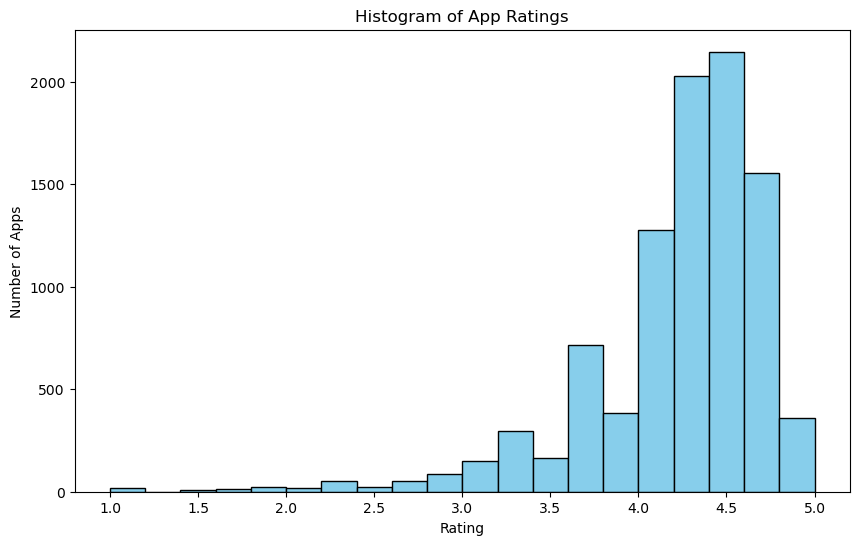

In [170]:
plt.figure(figsize=(10, 6))
df['Rating'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')


plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.title('Histogram of App Ratings')

plt.show()

**Insights from the histogram**: The data points are skewed to right, which indicated a positive feedback amoing most users since the majority of apps have High Ratings (more than 4).
Also now we are sure that the maximum value we get from the begining is just an oulier due to an error (shifting values of row 10471 to the left). Now the maximum rating value is 5 and the range is between 1 and 5.

### 6.2 Create a bar plot showing the top 10 most common app categories. 

First we need to get the top 10 most common apps in terms of category:

In [175]:
top_categories = df['Category'].value_counts().head(10)

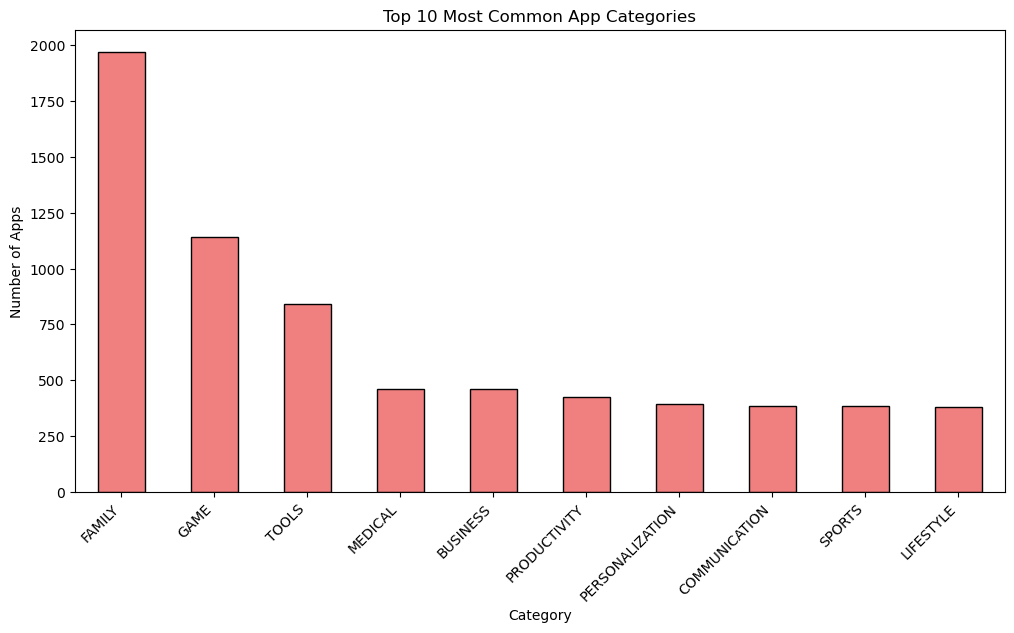

In [179]:
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Top 10 Most Common App Categories')

plt.xticks(rotation=45, ha='right')

plt.show()

**Insights from the histogram**: From the bar plot above, we could notice the most common apps in terms of category are Family apps since there are around 2000 app of them. Next we have Games as the second most common kind of applications by a number around 1200 app.